# Filtering list of Low steam

Create a list of building ideas to remove

In [1]:
import pandas as pd
import seaborn as sns
import gc
import matplotlib.pyplot as plt
%matplotlib inline

gc.collect()

4

0: 'electricity', 1: 'chilledwater', 2: 'steam', 3: 'hotwater'

In [2]:
combDF = pd.read_csv("../data/combDF.csv")
combDF['timestamp'] = pd.to_datetime(combDF.timestamp)
combDF.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count,meter,timestamp,meter_reading,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hour,weekday,month
0,0,0,Education,7432,2008.0,NaN,0,2016-01-01,0.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,4,1
1,0,1,Education,2720,2004.0,NaN,0,2016-01-01,0.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,4,1
2,0,2,Education,5376,1991.0,NaN,0,2016-01-01,0.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,4,1
3,0,3,Education,23685,2002.0,NaN,0,2016-01-01,0.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,4,1
4,0,4,Education,116607,1975.0,NaN,0,2016-01-01,0.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,4,1


In [3]:
combDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20125605 entries, 0 to 20125604
Data columns (total 19 columns):
 #   Column              Dtype         
---  ------              -----         
 0   site_id             int64         
 1   building_id         int64         
 2   primary_use         object        
 3   square_feet         int64         
 4   year_built          float64       
 5   floor_count         float64       
 6   meter               int64         
 7   timestamp           datetime64[ns]
 8   meter_reading       float64       
 9   air_temperature     float64       
 10  cloud_coverage      float64       
 11  dew_temperature     float64       
 12  precip_depth_1_hr   float64       
 13  sea_level_pressure  float64       
 14  wind_direction      float64       
 15  wind_speed          float64       
 16  hour                int64         
 17  weekday             int64         
 18  month               int64         
dtypes: datetime64[ns](1), float64(10), int64

In [48]:
len(combDF[combDF['meter_reading'] <= 0])

1867887

In [49]:
len(combDF[combDF['meter_reading'] < 0])/len(combDF.index)

0.0

In [50]:
len(combDF[combDF['meter_reading'] <= 0])/len(combDF.index)

0.09281147076075477

9.3% of values are zero

In [51]:
#counting percentage of zero readings
g = combDF.groupby(['building_id','meter'],as_index=False)[['meter_reading']].apply(lambda x: x[x == 0].count()/x.count()).reset_index()
isinstance(g,pd.DataFrame)
#g.reset_index(level=['building_id','meter'],inplace=True)
g.groupby('meter').describe()
#do boxplot

building_id                                                           \
            count         mean         std    min     25%     50%      75%   
meter                                                                        
0          1413.0   714.958953  418.115709    0.0  353.00   706.0  1073.00   
1           498.0   890.574297  437.162240    7.0  747.25   992.5  1249.75   
2           324.0  1115.043210  203.054244  745.0  940.00  1136.0  1296.25   
3           145.0   738.131034  510.722137  106.0  212.00  1003.0  1255.00   

              meter_reading                                               \
          max         count      mean       std  min       25%       50%   
meter                                                                      
0      1448.0        1413.0  0.043903  0.119885  0.0  0.000000  0.000000   
1      1413.0         498.0  0.154577  0.227096  0.0  0.005546  0.028910   
2      1442.0         324.0  0.126838  0.196130  0.0  0.008466  0.028500   
3      1331.0         145.0  0.269017  0.294540  0.0  0.011522  0.132164   

                           
            75%       max  
meter                      
0      0.015486  0.935206  
1      0.208923  0.999886  
2      0.138303  0.971744  
3      0.482861  0.995104

In [52]:
g[g>0.95].count()/g.count()

building_id      0.999580
meter            0.406303
meter_reading    0.002521
dtype: float64

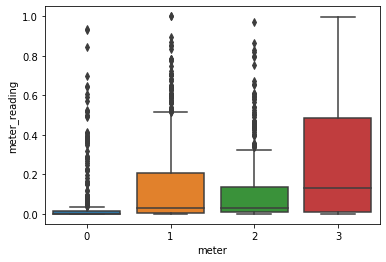

In [53]:
#make boxplot by meter type
sns.boxplot(data=g,x='meter', y='meter_reading')

In [54]:
g[(g.meter_reading>0.3) & (g.meter == 2)].count()

building_id      56
meter            56
meter_reading    56
dtype: int64

In [55]:
x = g[(g.meter_reading>0.3) & (g.meter == 2)]

In [56]:
steam_meters = x.building_id
steam_meters

941      747
954      754
960      758
962      759
966      762
981      769
987      771
988      772
992      774
996      776
1006     783
1016     789
1021     791
1035     796
1038     797
1041     798
1044     799
1053     802
1133     876
1172     893
1178     895
1191     900
1221     912
1233     916
1260     926
1278     933
1303     948
1319     954
1328     957
1346     963
1371     972
1382     976
1392     980
1414     991
1429     996
1538    1072
1545    1075
1551    1078
1623    1111
1634    1119
1690    1149
1704    1155
1723    1162
1770    1186
1781    1192
1808    1207
1833    1218
1870    1232
1889    1238
1927    1250
1944    1256
2078    1303
2087    1307
2134    1326
2183    1346
2373    1442
Name: building_id, dtype: int64

need to remove spikes

In [71]:
no_spike_combDF = combDF[(combDF.meter_reading<=20000) & (combDF.meter == 2)]
no_spike_combDF.tail()

,site_id,building_id,primary_use,square_feet,year_built,floor_count,meter,timestamp,meter_reading,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hour,weekday,month
20115139,15,1434,Education,33148,1967.0,NaN,2,2016-02-03 11:00:00,1226.9500,3.3,NaN,1.1,5.0,1015.0,160.0,9.3,11,2,2
20115142,15,1436,Manufacturing/industrial,11302,1937.0,NaN,2,2016-02-03 11:00:00,2045.2600,3.3,NaN,1.1,5.0,1015.0,160.0,9.3,11,2,2
20115144,15,1437,Education,111518,1968.0,NaN,2,2016-02-03 11:00:00,1304.8900,3.3,NaN,1.1,5.0,1015.0,160.0,9.3,11,2,2
20115146,15,1438,Education,108971,1990.0,NaN,2,2016-02-03 11:00:00,949.4790,3.3,NaN,1.1,5.0,1015.0,160.0,9.3,11,2,2
20115151,15,1442,Public services,99541,1993.0,NaN,2,2016-02-03 11:00:00,56.7735,3.3,NaN,1.1,5.0,1015.0,160.0,9.3,11,2,2


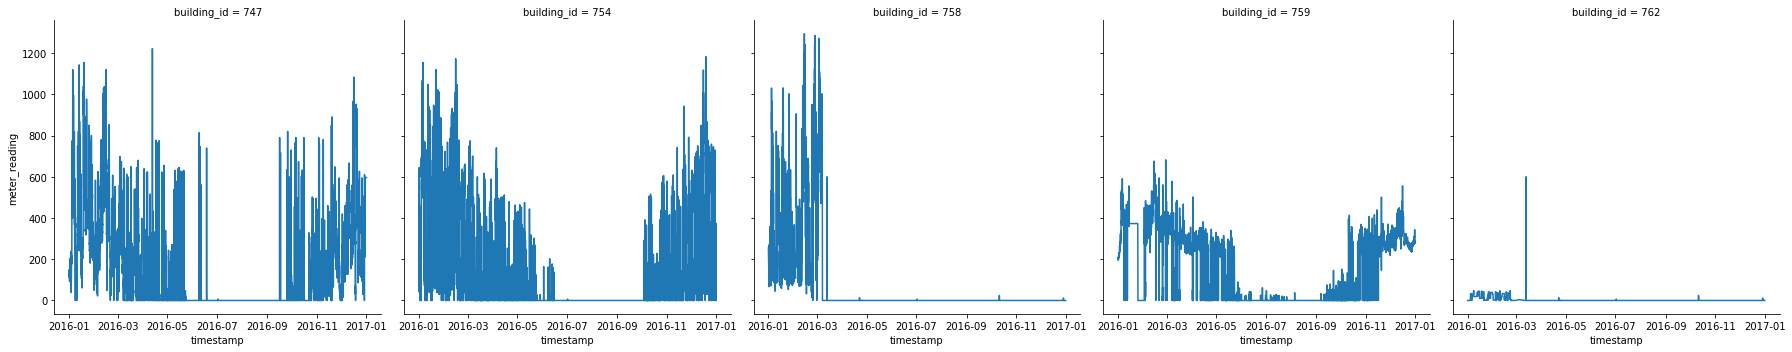

In [73]:
x=no_spike_combDF[(no_spike_combDF.building_id.isin(steam_meters[0:5])) & (no_spike_combDF.meter == 2)]

k = sns.relplot(x="timestamp", y="meter_reading",
                 col="building_id",
               kind="line", data=x)



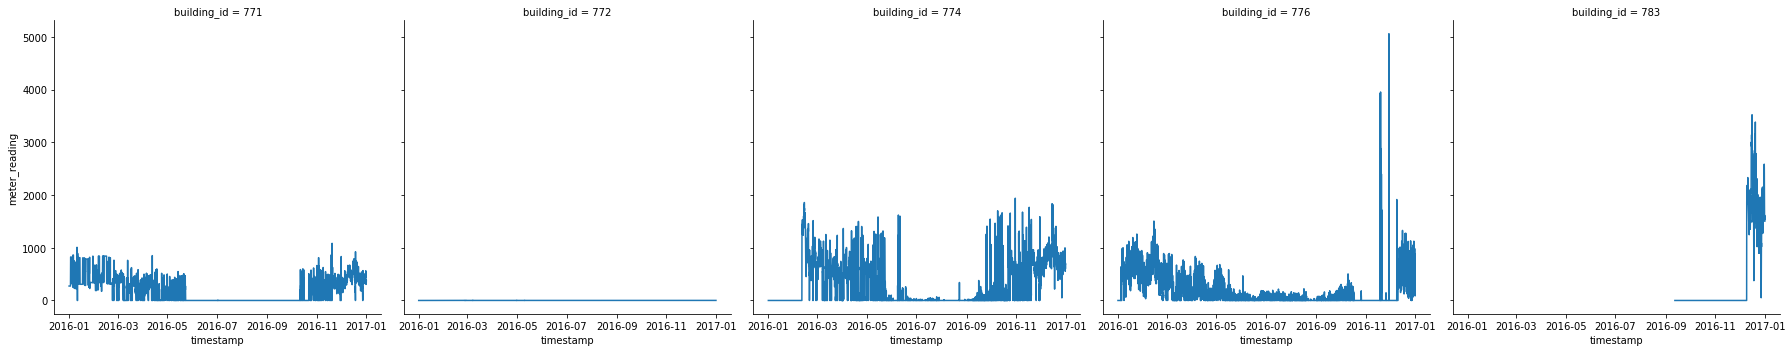

In [75]:
x=no_spike_combDF[(no_spike_combDF.building_id.isin(steam_meters[6:11])) & (no_spike_combDF.meter == 2)]
k = sns.relplot(x="timestamp", y="meter_reading",
                 col="building_id",
                 kind="line", data=x)

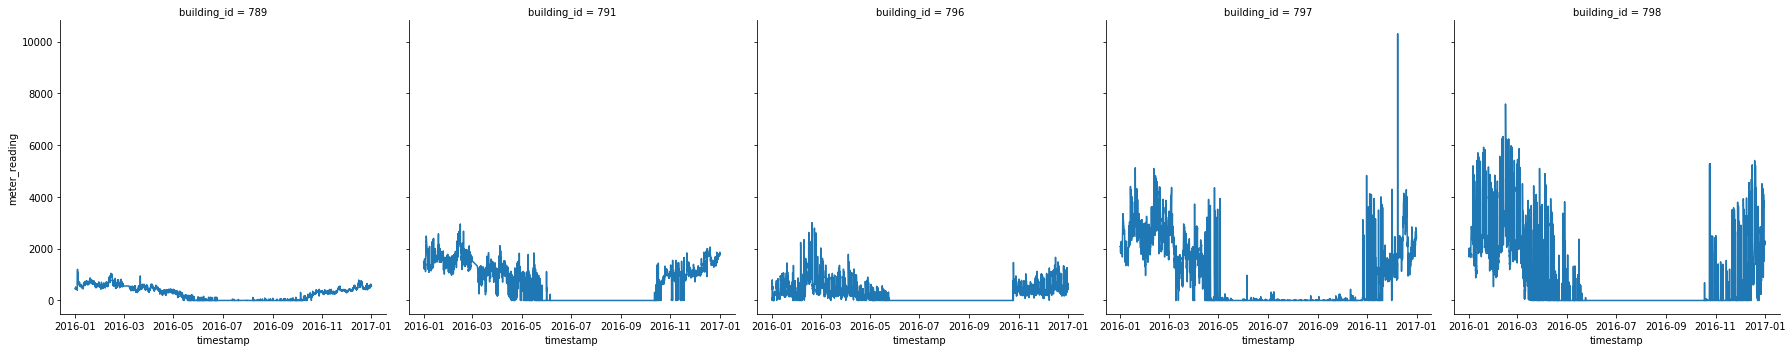

In [76]:
x=no_spike_combDF[(no_spike_combDF.building_id.isin(steam_meters[11:16])) & (no_spike_combDF.meter == 2)]

k = sns.relplot(x="timestamp", y="meter_reading",
                 col="building_id",
                 kind="line", data=x)

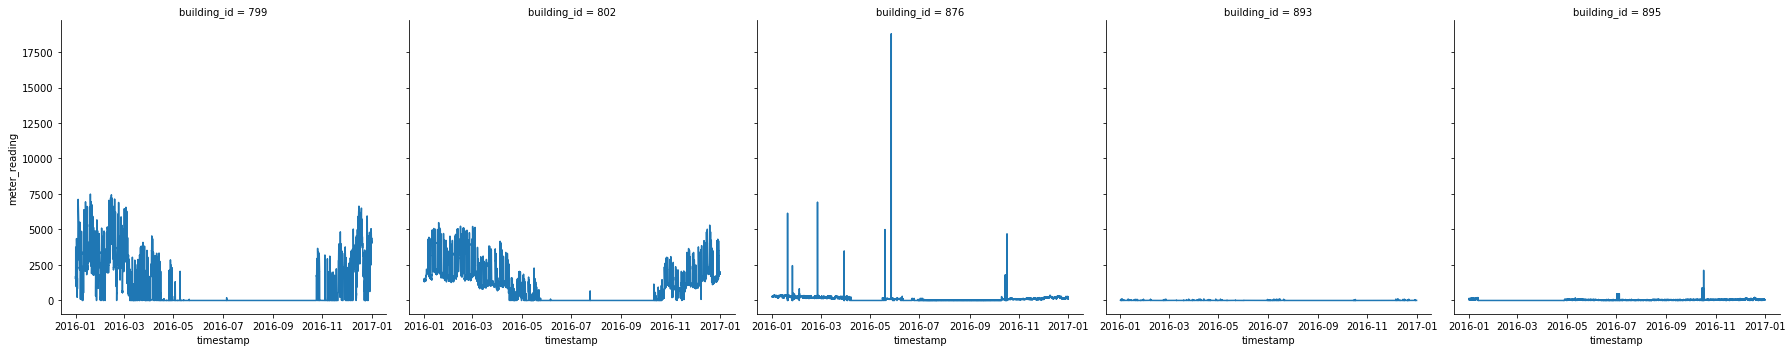

In [77]:
x=no_spike_combDF[(no_spike_combDF.building_id.isin(steam_meters[16:21])) & (no_spike_combDF.meter == 2)]

k = sns.relplot(x="timestamp", y="meter_reading",
                 col="building_id",
                 kind="line", data=x)

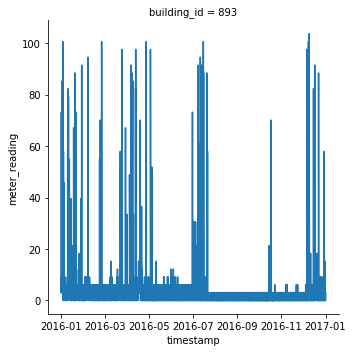

In [61]:
x=combDF[(combDF.building_id.isin(steam_meters[19:20])) & (combDF.meter == 2)]

k = sns.relplot(x="timestamp", y="meter_reading",
                 col="building_id",
                 kind="line", data=x)

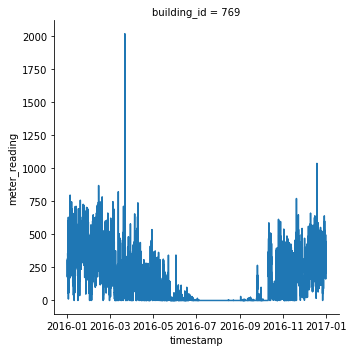

In [41]:
x=combDF[(combDF.building_id.isin(steam_meters[20:21])) & (combDF.meter == 2)]

k = sns.relplot(x="timestamp", y="meter_reading",
                 col="building_id",
                 kind="line", data=x)

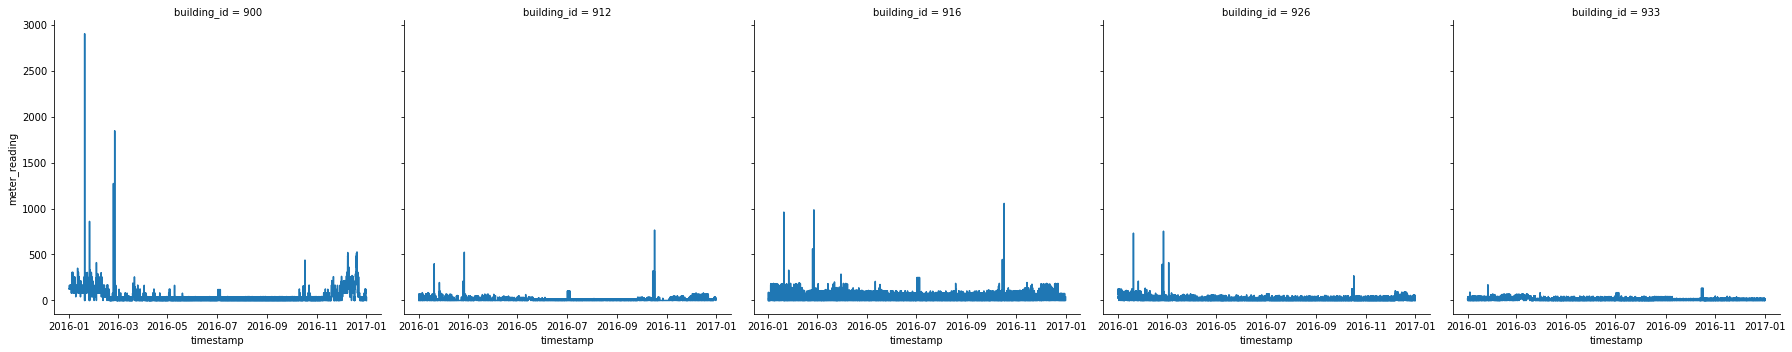

In [36]:
x=combDF[(combDF.building_id.isin(elect_meters[21:26])) & (combDF.meter == 2)]

k = sns.relplot(x="timestamp", y="meter_reading",
                 col="building_id",
                 kind="line", data=x)

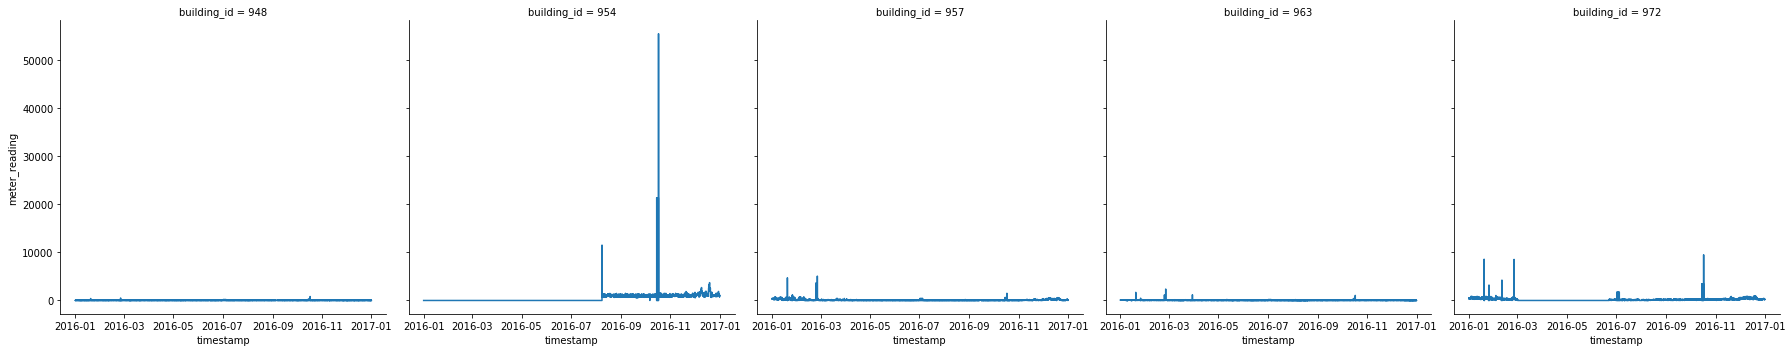

In [37]:
x=combDF[(combDF.building_id.isin(elect_meters[26:31])) & (combDF.meter == 2)]

k = sns.relplot(x="timestamp", y="meter_reading",
                 col="building_id",
                 kind="line", data=x)

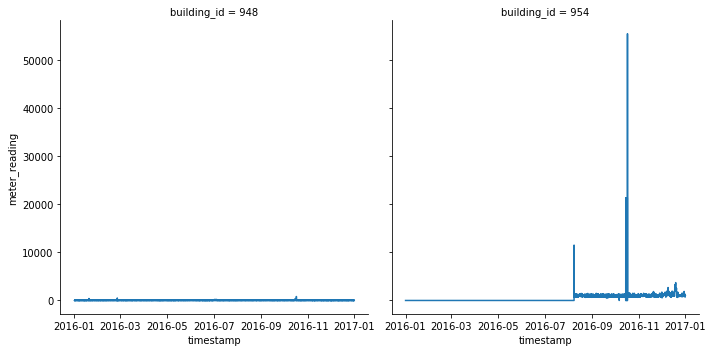

In [38]:
x=combDF[(combDF.building_id.isin(elect_meters[26:28])) & (combDF.meter == 2)]

k = sns.relplot(x="timestamp", y="meter_reading",
                 col="building_id",
                 kind="line", data=x)

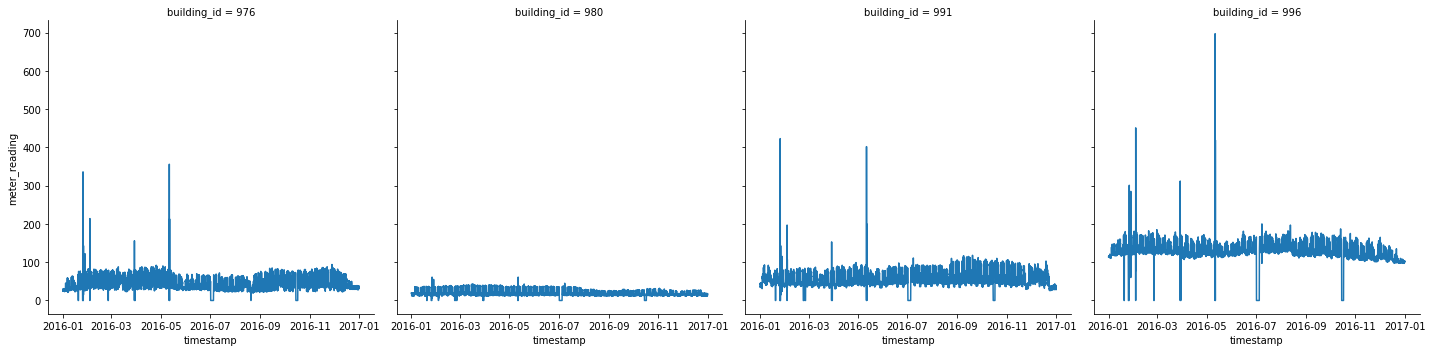

In [42]:
x=combDF[(combDF.building_id.isin(elect_meters[31:36])) & (combDF.meter == 0)]

k = sns.relplot(x="timestamp", y="meter_reading",
                 col="building_id",
                 kind="line", data=x)

In [19]:
h = combDF.groupby(['building_id','meter'],as_index=False)[['meter_reading']].apply(lambda x: x[x == 0].count()/x.count()).reset_index()
isinstance(g,pd.DataFrame)
#g.reset_index(level=['building_id','meter'],inplace=True)
h.describe()
#do boxplot

,building_id,meter,meter_reading
count,2380.000000,2380.000000,2380.000000
mean,807.582353,0.664286,0.092066
std,429.858323,0.928002,0.184519
min,0.000000,0.000000,0.000000
25%,404.750000,0.000000,0.000000
50%,900.000000,0.000000,0.005254
75%,1194.250000,1.000000,0.057907
max,1448.000000,3.000000,0.999886


In [ ]:
#meters to remove
#747, 758, 759, 776,954

In [24]:
h[(h.meter_reading>0.2) & (h.meter == 0)].count()

building_id      131
meter            131
meter_reading    131
dtype: int64

In [25]:
too_low_electricity_iter1 = h[(h.meter_reading>0.2) & (h.meter == 0)][['building_id','meter']]
too_low_electricity_iter1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 0 to 2377
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   building_id  131 non-null    int64
 1   meter        131 non-null    int64
dtypes: int64(2)
memory usage: 3.1 KB


In [37]:
too_low_electricity_iter1.to_csv("../data_cleaning/too_low_electricity_iter1.csv", index = False)